In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load data
df=pd.read_csv("C:\\Users\\fahad\\Downloads\\uberDataset.csv")

In [33]:
# Inspect the data
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [34]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [35]:
# check for null values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [36]:
# Handling null values
df["PURPOSE"]=df["PURPOSE"].replace(np.nan,"Not")

In [37]:
# check for null values
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [38]:
# Changing the data type of date columns
df["START_DATE"]=pd.to_datetime(df["START_DATE"], errors="coerce")
df["END_DATE"]=pd.to_datetime(df["END_DATE"], errors="coerce")

In [39]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [40]:
# CREATE COLUMNS FOR DATE AND TIME
from datetime import datetime
df["start date"]=pd.DatetimeIndex(df["START_DATE"]).date
df["start time"]=pd.DatetimeIndex(df["START_DATE"]).hour
df["Month"]=pd.DatetimeIndex(df["START_DATE"]).month_name()
df.drop("START_DATE", axis=1, inplace=True)
df.drop("END_DATE", axis=1, inplace=True)

In [41]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,start date,start time,Month
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,January
1,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,January
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,January
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,January
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,January


In [42]:
# add column for day night
df["day time"]=pd.cut(x=df["start time"], bins=[0,4,12,16,22,24], labels=["Night","Morning","Afternoon","Evening","Night"], ordered=False)

In [43]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,start date,start time,Month,day time
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,January,Evening
1,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,January,Night
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,January,Evening
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,January,Evening
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,January,Afternoon


In [44]:
# check for null values
df.isnull().sum()

CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
start date    735
start time    735
Month         735
day time      742
dtype: int64

In [45]:
# remove null values
df.dropna(inplace=True)

In [46]:
# check for null values
df.isnull().sum()

CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
start date    0
start time    0
Month         0
day time      0
dtype: int64

In [47]:
# 1. In which category do people book the most uber rides?
count_category=df["CATEGORY"].value_counts().sort_values(ascending=False).reset_index()
print(count_category)

   CATEGORY  count
0  Business    400
1  Personal     14


In [48]:
# In Business category people book the most uber rides.

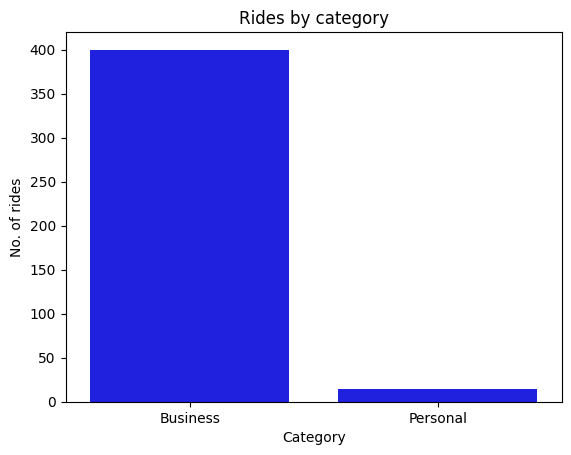

In [49]:
# Visualization
sns.barplot(x="CATEGORY", y="count", data=count_category, color="blue")
plt.xlabel("Category")
plt.ylabel("No. of rides")
plt.title("Rides by category")
plt.show()

In [50]:
# 2. For which purpose do people book the most uber rides?
count_purpose=df["PURPOSE"].value_counts().sort_values(ascending=False).reset_index()
print(count_purpose)

           PURPOSE  count
0              Not    160
1          Meeting     78
2   Meal/Entertain     62
3   Customer Visit     46
4  Errand/Supplies     45
5   Temporary Site     14
6  Between Offices      9


In [51]:
# For Meeting purpose people book the most uber rides.

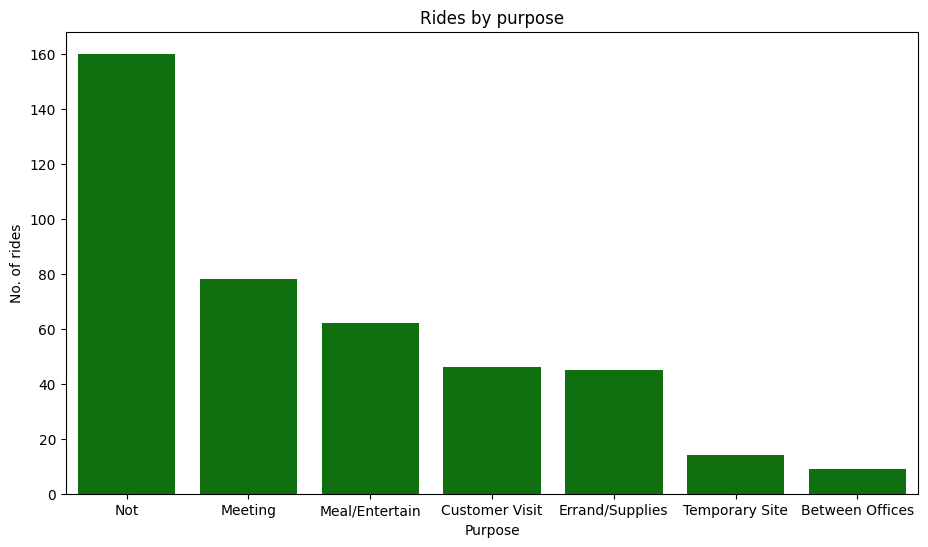

In [52]:
# Visualization
plt.figure(figsize=(11,6))
sns.barplot(x="PURPOSE", y="count", data=count_purpose, color="green")
plt.xlabel("Purpose")
plt.ylabel("No. of rides")
plt.title("Rides by purpose")        
plt.show()

In [53]:
# 3. At what time do people book the most uber rides?

In [54]:
count_time=df["day time"].value_counts().sort_values(ascending=False).reset_index()
count_time

,day time,count
0,Evening,163
1,Afternoon,131
2,Morning,103
3,Night,17


In [55]:
# At evening people book the most uber rides

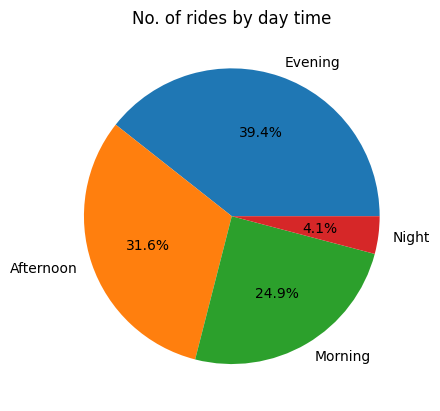

In [56]:
# Visualization
plt.pie(count_time["count"], labels=count_time["day time"], autopct="%1.1f%%")
plt.title("No. of rides by day time")
plt.show()

In [57]:
# 4.  In which month people book most and least uber rides?

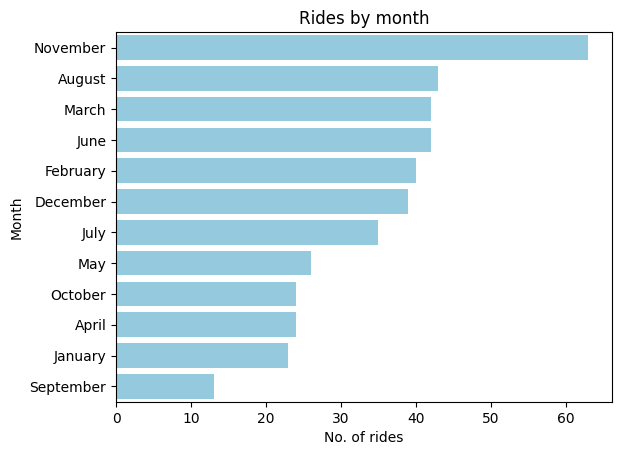

In [62]:
count_month=df["Month"].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x="count", y="Month", data=count_month, color="skyblue")
plt.xlabel("No. of rides")
plt.ylabel("Month")
plt.title("Rides by month")
plt.show()

In [ ]:
# In November and September months people book most and least Uber rides.